In [ ]:
from itertools import cycle
import pandas as pd 
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch 
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
df = pd.read_csv("sample_stocks.csv")
df

,returns,dividendyield
0,-19,0.0
1,-13,0.0
2,-14,0.0
3,-9,0.0
4,-19,0.0
5,-10,0.0
6,-20,0.0
7,-11,0.0
8,-12,0.0
9,-10,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 2 columns):
returns          648 non-null int64
dividendyield    648 non-null float64
dtypes: float64(1), int64(1)
memory usage: 10.2 KB


In [ ]:
df.describe()

,returns,dividendyield
count,648.000000,648.000000
mean,10.354938,2.434568
std,19.552899,1.645191
min,-20.000000,0.000000
25%,-10.000000,0.700000
50%,10.500000,2.500000
75%,31.000000,4.100000
max,40.000000,4.900000


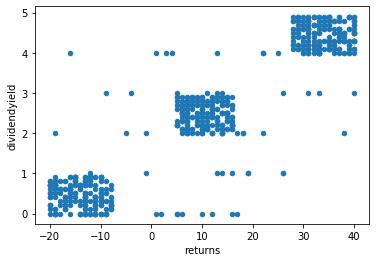

In [ ]:
df1 = df
df1.plot(kind='scatter', x='returns', y='dividendyield')


In [ ]:
# Normalização dos dados
df2 = df1
df2['returns'] = (df1['returns'] - df1['returns'].mean()) / df1['returns'].std()
df2['dividendyield'] = (df1['dividendyield'] - df1['dividendyield'].mean()) / df1['dividendyield'].std()
df2 = df2.round(2)
df2

,returns,dividendyield
0,-1.50,-1.48
1,-1.19,-1.48
2,-1.25,-1.48
3,-0.99,-1.48
4,-1.50,-1.48
5,-1.04,-1.48
6,-1.55,-1.48
7,-1.09,-1.48
8,-1.14,-1.48
9,-1.04,-1.48


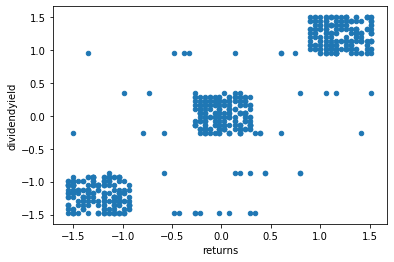

In [ ]:
df2.plot(kind='scatter', x='returns', y='dividendyield')

In [ ]:
# Aplicando a clusterização
X = df2[['returns', 'dividendyield']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
kmeans.inertia_

386.3641

In [ ]:
k = list(x for x in range(31) if x >= 2)
inertia = list()

for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertiaValue = kmeans.inertia_
    inertia.append(inertiaValue)
    print(f"k: {i}, inertia: {inertiaValue.round(2)}")

k: 2, inertia: 386.36
k: 3, inertia: 77.63
k: 4, inertia: 61.71
k: 5, inertia: 54.22
k: 6, inertia: 47.76
k: 7, inertia: 41.66
k: 8, inertia: 37.39
k: 9, inertia: 33.12
k: 10, inertia: 29.48
k: 11, inertia: 26.55
k: 12, inertia: 23.08
k: 13, inertia: 21.54
k: 14, inertia: 19.23
k: 15, inertia: 16.93
k: 16, inertia: 16.21
k: 17, inertia: 14.34
k: 18, inertia: 13.52
k: 19, inertia: 13.07
k: 20, inertia: 12.4
k: 21, inertia: 11.79
k: 22, inertia: 11.39
k: 23, inertia: 10.89
k: 24, inertia: 10.41
k: 25, inertia: 9.91
k: 26, inertia: 9.54
k: 27, inertia: 9.19
k: 28, inertia: 8.64
k: 29, inertia: 8.12
k: 30, inertia: 7.89


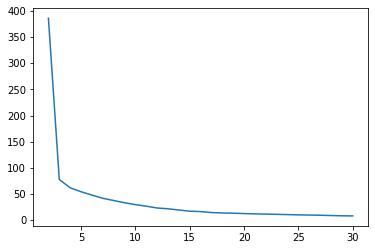

In [ ]:
plt.plot(k, inertia)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='random')
y_pred = kmeans.fit_predict(X)

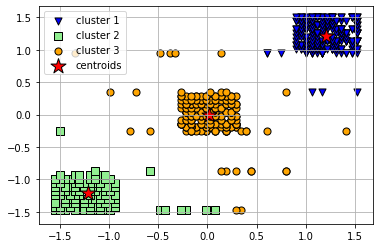

In [ ]:
# Plotando os clusters

plt.scatter(X.loc[y_pred == 0, 'returns'], X.loc[y_pred == 0, 'dividendyield'], s=50, c='blue', marker='v', edgecolor='black', label='cluster 1')
plt.scatter(X.loc[y_pred == 1, 'returns'], X.loc[y_pred == 1, 'dividendyield'], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 2')
plt.scatter(X.loc[y_pred == 2, 'returns'], X.loc[y_pred == 2, 'dividendyield'], s=50, c='orange', marker='o', edgecolor='black', label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

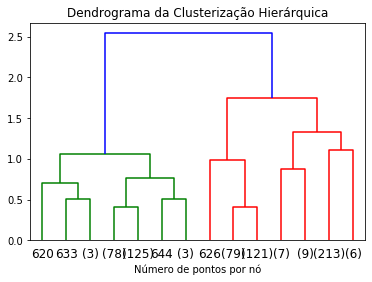

In [ ]:
hierarchicalClustering = AgglomerativeClustering(distance_threshold=0
                                               , linkage='average'
                                               , n_clusters=None)
hierarchicalClusteringModel = hierarchicalClustering.fit(X)

def plot_dendrogram(hierarchicalClusteringModel, **kwargs):

    counts = np.zeros(hierarchicalClusteringModel.children_.shape[0])
    n_samples = len(hierarchicalClusteringModel.labels_)
    for i, j in enumerate(hierarchicalClusteringModel.children_):
        current_count = 0
        for child_leaf in j:
            if child_leaf < n_samples:
                current_count += 1
            else:
                current_count += counts[child_leaf - n_samples]
        counts[i] = current_count

    dendrogramInput = np.column_stack([hierarchicalClusteringModel.children_                                   , hierarchicalClusteringModel.distances_
                                     , counts]).astype(float)

    
    dendrogram(dendrogramInput, **kwargs)

plt.title("Dendrograma da Clusterização Hierárquica")
plot_dendrogram(hierarchicalClusteringModel, truncate_mode='level', p=3)
plt.xlabel("Número de pontos por nó")
plt.show() 

In [ ]:
# Plus: implementação do modelo de clusterização de Birch
birchClustering = Birch(n_clusters=3).fit(X)
birchClustering

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=3,
      threshold=0.5)

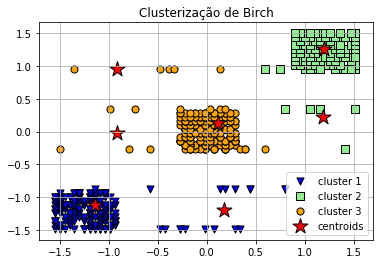

In [ ]:
# plot results
labels = birchClustering.labels_
centroids = birchClustering.subcluster_centers_
n_clusters = np.unique(labels).size
plt.title("Clusterização de Birch")
plt.scatter(X.loc[labels == 0, 'returns'], X.loc[labels == 0, 'dividendyield'], s=50, c='blue', edgecolor='black', marker='v', label='cluster 1')
plt.scatter(X.loc[labels == 1, 'returns'], X.loc[labels == 1, 'dividendyield'], s=50, c='lightgreen', edgecolor='black', marker='s', label='cluster 2')
plt.scatter(X.loc[labels == 2, 'returns'], X.loc[labels == 2, 'dividendyield'], s=50, c='orange', edgecolor='black', marker='o', label='cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=250, edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()